In [11]:
import json
import pandas as pd
import numpy as np

datafile = "data/4815902510002BY_AR15J015457-20201116-171959-9852/AR15J015457-20201116-171959-9852.json"
data = {}

In [12]:
# Code übernommen von Simo Mäkelä https://github.com/makes/zoll-json/blob/master/zoll-json.ipynb

with open(datafile, "r") as fd:
    data = json.load(fd)

zoll_record = data['ZOLL']['FullDisclosure'][0]['FullDisclosureRecord']

#record_types: dictionary mit Auflistung Anzahl der Items für jeweiligen Recording Typ
record_types = {}
n_items = 0

for item in zoll_record:
    n_items = n_items + 1
    for key in item:
        if key in record_types:
            record_types[key] = record_types[key] + 1
        else:
            record_types[key] = 1

print("FullDisclosureRecord contains", n_items, "items:\n")
for key, value in record_types.items():
    print("{: >20} {: >6}".format(key, value))

wave_records = [] # contains objects of type ContinWaveRec
trend_reports = [] # contains objects of type TrendRpt

for item in zoll_record:
    for key in item:
        if key == "ContinWaveRec":
            wave_records.append(item['ContinWaveRec'])
        if key == "TrendRpt":
            trend_reports.append(item['TrendRpt'])
print("\n")
print(len(wave_records), "ContinWaveRec items found.")
print(len(trend_reports), "TrendRpt items found.")

FullDisclosureRecord contains 21671 items:

             NewCase      2
        Ecg12LeadRec      4
       AnnotationEvt   2507
            TrendRpt    145
 DeviceConfiguration      1
        DataChannels      1
         PatientInfo      1
         AlarmLimits      1
        TraceConfigs      9
                 Aed     11
       DeleteCaseRec      1
         DisplayInfo      8
       ContinWaveRec   1061
     CprAccelWaveRec   1449
      CprCompression   1342
   AedContinAnalysis    954
            AlarmEvt     12
         SnapshotRpt      9
    InstrumentPacket     17
         SysLogEntry   3884
       Ecg12LeadDisc      4
  ReadinessLogRecord    246
         CaseSummary      2
          DefibTrace   7971
            PrtTrace   2029


1061 ContinWaveRec items found.
145 TrendRpt items found.


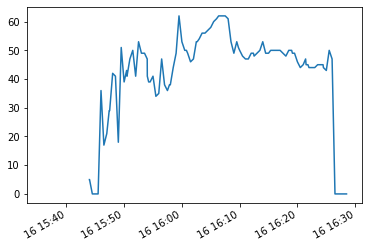

In [13]:
etco2 = []
timestamps = []

for report in trend_reports:
    etco2.append(report['Trend']['Etco2']['TrendData']['Val']['#text'])
    timestamps.append(pd.to_datetime(report['StdHdr']['DevDateTime']))

df = pd.DataFrame(etco2, columns=['etCO2'])
df.index = timestamps

df = df.replace({
    "etCO2":-21846,
    }, np.nan)

df['etCO2'].plot()
plt.show()